In [1]:
! python -m pip install numpy matplotlib pandas scipy seaborn scikit-learn tensorflow keras_tuner

  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached keras_tuner-1.4.8-py3-none-any.whl.metadata (5.6 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33.4-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached termcolor-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Usin

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! python -m pip install streamlit

  Using cached streamlit-1.53.1-py3-none-any.whl.metadata (10 kB)
  Using cached altair-6.0.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached pyarrow-23.0.0-cp313-cp313-win_amd64.whl.metadata (3.1 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached gitpython-3.1.46-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached narwhals-2.15.0-py3-none-any.whl.metadata (13 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
Using cached streamlit-1.53.1-py3-none-any.whl (9.1 MB)
Using cached altair-6.0.0-py3-none-any.whl (795 kB)
Using cached blinker-1.9.0-py3-none-any.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.pyplot as mpl

from tensorflow import keras 
from keras.layers import Dense, Flatten, Input
from keras.models import Sequential
from keras.optimizers import Adam
from keras_tuner import RandomSearch

10. I denna uppgift ska vi använda MNIST-datan som vi arbetat med tidigare. Detta för att ha ett bekant dataset att arbeta med och experimentera med ANN-modeller. 

Hämtar MNIST-datan och delar upp det i tränings och testdata.

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

a) Träna en ANN-modell på MNIST-datan. Vad får du för resultat? 

Normaliserar pixlarna genom att divivdera x_train och x_test med 255.

In [5]:
X_train = x_train / 255.0
X_test = x_test / 255.0

Printar ut formen på all data.

In [6]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (60000, 28, 28)
x_test:  (10000, 28, 28)
y_train:  (60000,)
y_test:  (10000,)


En visualisering på en siffra på MNIST.

Label: 5


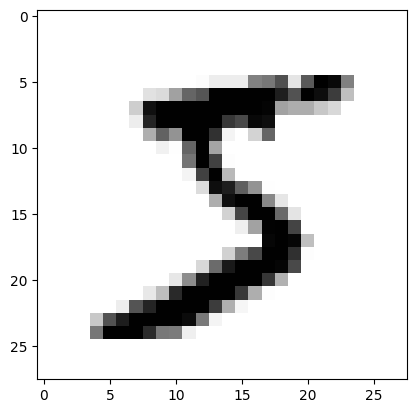

In [7]:
plt.imshow(x_train[0], cmap=mpl.cm.binary)
print("Label:", y_train[0])

Bygger neuralt nätverk som plattar ut 28×28-bilder, har lagt till två dolda lager och klassficerar de i 10 klasser.

In [8]:
model1 = Sequential()
model1.add(Input(shape=(28, 28)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

Kompilerar modellen så den är redo för att tränas.

In [9]:
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Tränar modellen.

In [10]:
history = model1.fit(X_train, y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9257 - loss: 0.2581 - val_accuracy: 0.9599 - val_loss: 0.1389
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9665 - loss: 0.1110 - val_accuracy: 0.9672 - val_loss: 0.1117
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9764 - loss: 0.0767 - val_accuracy: 0.9673 - val_loss: 0.1063
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9817 - loss: 0.0583 - val_accuracy: 0.9712 - val_loss: 0.1018
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9849 - loss: 0.0453 - val_accuracy: 0.9687 - val_loss: 0.1179
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9888 - loss: 0.0348 - val_accuracy: 0.9724 - val_loss: 0.0988
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9904 - loss: 0.0289 - val_accuracy: 0.9746 - val_loss: 0.0984
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9916 - loss: 0.0238 - 

Ett diagram som visar oss hur accuracy och loss ändras efter varje epoch både för tränings och testdata. Bra resultat då accuracy ligger högt upp och loss ligger lågt.

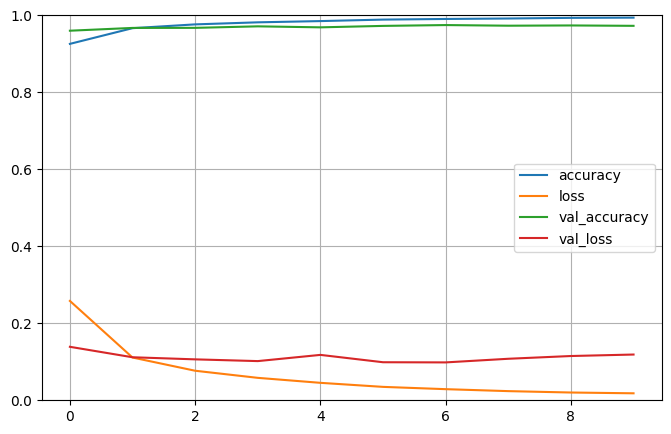

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Evaluerar modellen

In [12]:
model1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.1146


[0.11456090211868286, 0.9718000292778015]

Enligt evalueringen är modellen mycket bra vilket innebär att den har lärt sig mönstren bra och kommer att göra få misstag. Tränings och valideringsdatan har liknande resultat vilket innebär att den är inte överanpassad.

b) Prova justera hyperparametrarna med *KerasTuner*. Notera, du har som vanligt dokumentationen till din hjälp. Får du bättre resultat? 

En keras modell byggs med samma struktur som tidigare.

In [13]:
def build_model(hp):
    model2 = Sequential()

    model2.add(Input(shape=(28,28)))
    model2.add(Flatten())

    model2.add(Dense(
        units=hp.Int('units_1',min_value=64, max_value=256, step=64), activation='relu'
    ))
    
    model2.add(Dense(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'
    ))
    model2.add(Dense(10, activation='softmax'))

    model2.compile(optimizer=Adam(
        hp.Choice('learning_rate',  [1e-2, 1e-3, 1e-4])
    ),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
    
    return model2

En tuner som söker efter de bästa hyperparametrarna för modellen med RandomSearch.

In [14]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory=r"C:\keras_tuner",
    project_name="mnist_randomsearch",
)

In [15]:
tuner.search(
    X_train,
    y_train,
    epochs = 5,
    validation_split=0.1
)

Trial 10 Complete [00h 00m 19s]
val_accuracy: 0.9681666493415833

Best val_accuracy So Far: 0.9788333177566528
Total elapsed time: 00h 04m 28s


Tuner söker efter olika hyperparametrarna för att hitta den bästa modellen.

Hämtar den bästa modellen.

In [16]:
best_model = tuner.get_best_models(num_models=1)[0]

c:\Users\genc-\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [17]:
history = best_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9871 - loss: 0.0395 - val_accuracy: 0.9826 - val_loss: 0.0657
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9912 - loss: 0.0260 - val_accuracy: 0.9838 - val_loss: 0.0601
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9925 - loss: 0.0224 - val_accuracy: 0.9793 - val_loss: 0.0810
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9936 - loss: 0.0199 - val_accuracy: 0.9794 - val_loss: 0.0813
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9942 - loss: 0.0178 - val_accuracy: 0.9827 - val_loss: 0.0654
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9948 - loss: 0.0155 - val_accuracy: 0.9779 - val_loss: 0.0898
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9954 - loss: 0.0138 - val_accuracy: 0.9796 - val_loss: 0.0953
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9956 - loss: 0.0130 - 

Den här modellen utvärderar den bästa modellen på testdata.

In [18]:
test_loss, test_acc = best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9793 - loss: 0.1072


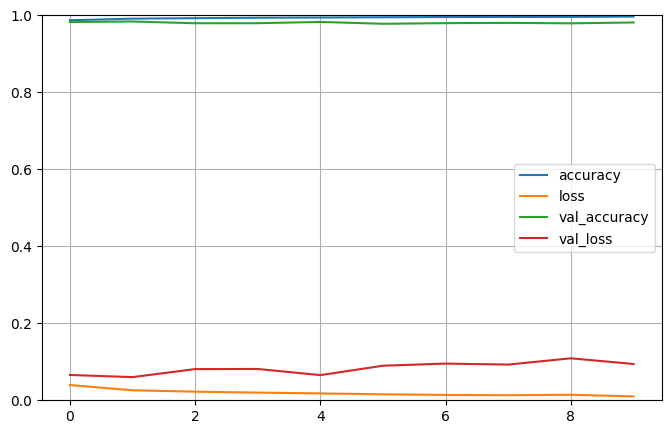

In [19]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Med kerastuner ändras in resultat så mycket. När modellen tränas vanligt är det redan ett väldigt evaluerings resultat och därför skiljer inte med eller utan kerastuner.